# Pandas Practice

## Importing libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Defining and printing structures

In [10]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
dates = pd.date_range('20180101', periods=6)
dates

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6, 4), index = dates, columns = list('ABCD'))
df

,A,B,C,D
2018-01-01,1.247157,0.912673,0.334604,1.019624
2018-01-02,0.168131,-0.000815,-1.225034,-0.772459
2018-01-03,0.436447,0.716087,0.499898,-0.734221
2018-01-04,1.684051,-0.256368,0.040070,-0.061859
2018-01-05,0.206657,1.522206,-0.719939,-0.182852
2018-01-06,2.238229,-0.244015,-0.719950,-1.414779


In [8]:
df2 = pd.DataFrame({ 'A' : 1.,
                    'B' : pd.Timestamp('20180102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2018-01-02,1.0,3,test,foo
1,1.0,2018-01-02,1.0,3,train,foo
2,1.0,2018-01-02,1.0,3,test,foo
3,1.0,2018-01-02,1.0,3,train,foo


In [12]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing data

In [13]:
df.head()

,A,B,C,D
2018-01-01,1.247157,0.912673,0.334604,1.019624
2018-01-02,0.168131,-0.000815,-1.225034,-0.772459
2018-01-03,0.436447,0.716087,0.499898,-0.734221
2018-01-04,1.684051,-0.256368,0.040070,-0.061859
2018-01-05,0.206657,1.522206,-0.719939,-0.182852


In [14]:
df.tail()

,A,B,C,D
2018-01-02,0.168131,-0.000815,-1.225034,-0.772459
2018-01-03,0.436447,0.716087,0.499898,-0.734221
2018-01-04,1.684051,-0.256368,0.040070,-0.061859
2018-01-05,0.206657,1.522206,-0.719939,-0.182852
2018-01-06,2.238229,-0.244015,-0.719950,-1.414779


In [18]:
df.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06'],
              dtype='datetime64[ns]', freq='D')

In [19]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [20]:
df.values

array([[ 1.24715677e+00,  9.12673196e-01,  3.34603984e-01,
         1.01962418e+00],
       [ 1.68130526e-01, -8.14983885e-04, -1.22503378e+00,
        -7.72458757e-01],
       [ 4.36447132e-01,  7.16086929e-01,  4.99898008e-01,
        -7.34221258e-01],
       [ 1.68405080e+00, -2.56367723e-01,  4.00703733e-02,
        -6.18585790e-02],
       [ 2.06656995e-01,  1.52220563e+00, -7.19939177e-01,
        -1.82851641e-01],
       [ 2.23822876e+00, -2.44014850e-01, -7.19950037e-01,
        -1.41477904e+00]])

## Summarising and operating on data

In [22]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.996778,0.441628,-0.298392,-0.357758
std,0.860366,0.723591,0.687980,0.830220
min,0.168131,-0.256368,-1.225034,-1.414779
25%,0.264105,-0.183215,-0.719947,-0.762899
50%,0.841802,0.357636,-0.339934,-0.458536
75%,1.574827,0.863527,0.260971,-0.092107
max,2.238229,1.522206,0.499898,1.019624


In [24]:
df.T

,2018-01-01 00:00:00,2018-01-02 00:00:00,2018-01-03 00:00:00,2018-01-04 00:00:00,2018-01-05 00:00:00,2018-01-06 00:00:00
A,1.247157,0.168131,0.436447,1.684051,0.206657,2.238229
B,0.912673,-0.000815,0.716087,-0.256368,1.522206,-0.244015
C,0.334604,-1.225034,0.499898,0.040070,-0.719939,-0.719950
D,1.019624,-0.772459,-0.734221,-0.061859,-0.182852,-1.414779


In [25]:
df.sort_index(axis = 1, ascending = False)

,D,C,B,A
2018-01-01,1.019624,0.334604,0.912673,1.247157
2018-01-02,-0.772459,-1.225034,-0.000815,0.168131
2018-01-03,-0.734221,0.499898,0.716087,0.436447
2018-01-04,-0.061859,0.040070,-0.256368,1.684051
2018-01-05,-0.182852,-0.719939,1.522206,0.206657
2018-01-06,-1.414779,-0.719950,-0.244015,2.238229


In [26]:
df.sort_values(by = 'B')

,A,B,C,D
2018-01-04,1.684051,-0.256368,0.040070,-0.061859
2018-01-06,2.238229,-0.244015,-0.719950,-1.414779
2018-01-02,0.168131,-0.000815,-1.225034,-0.772459
2018-01-03,0.436447,0.716087,0.499898,-0.734221
2018-01-01,1.247157,0.912673,0.334604,1.019624
2018-01-05,0.206657,1.522206,-0.719939,-0.182852


In [27]:
df['A']

2018-01-01    1.247157
2018-01-02    0.168131
2018-01-03    0.436447
2018-01-04    1.684051
2018-01-05    0.206657
2018-01-06    2.238229
Freq: D, Name: A, dtype: float64

In [28]:
df[0: 3]

,A,B,C,D
2018-01-01,1.247157,0.912673,0.334604,1.019624
2018-01-02,0.168131,-0.000815,-1.225034,-0.772459
2018-01-03,0.436447,0.716087,0.499898,-0.734221


## Selection using Label

In [30]:
df.loc[dates[0]]

A    1.247157
B    0.912673
C    0.334604
D    1.019624
Name: 2018-01-01 00:00:00, dtype: float64

In [31]:
df.loc[:,['A','B']]

,A,B
2018-01-01,1.247157,0.912673
2018-01-02,0.168131,-0.000815
2018-01-03,0.436447,0.716087
2018-01-04,1.684051,-0.256368
2018-01-05,0.206657,1.522206
2018-01-06,2.238229,-0.244015


In [32]:
df.loc['20180102': '20180104',['A','B']]

,A,B
2018-01-02,0.168131,-0.000815
2018-01-03,0.436447,0.716087
2018-01-04,1.684051,-0.256368


In [33]:
df.loc['20180105','A']

0.20665699511059527

## Selection using Position

In [34]:
df.iloc[3]

A    1.684051
B   -0.256368
C    0.040070
D   -0.061859
Name: 2018-01-04 00:00:00, dtype: float64

In [36]:
df.iloc[2:5, 1:3]

,B,C
2018-01-03,0.716087,0.499898
2018-01-04,-0.256368,0.040070
2018-01-05,1.522206,-0.719939


In [37]:
df.iloc[[1, 3, 5], :]

,A,B,C,D
2018-01-02,0.168131,-0.000815,-1.225034,-0.772459
2018-01-04,1.684051,-0.256368,0.040070,-0.061859
2018-01-06,2.238229,-0.244015,-0.719950,-1.414779


## Plotting


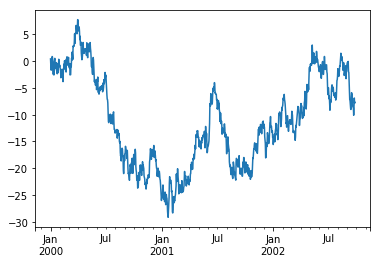

In [39]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()